In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 

In [2]:
df = pd.read_csv(r'/kaggle/input/air-quality-data-in-india/city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
raw_df = df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])   #converting Date's datatype from object to DateTime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

<AxesSubplot:>

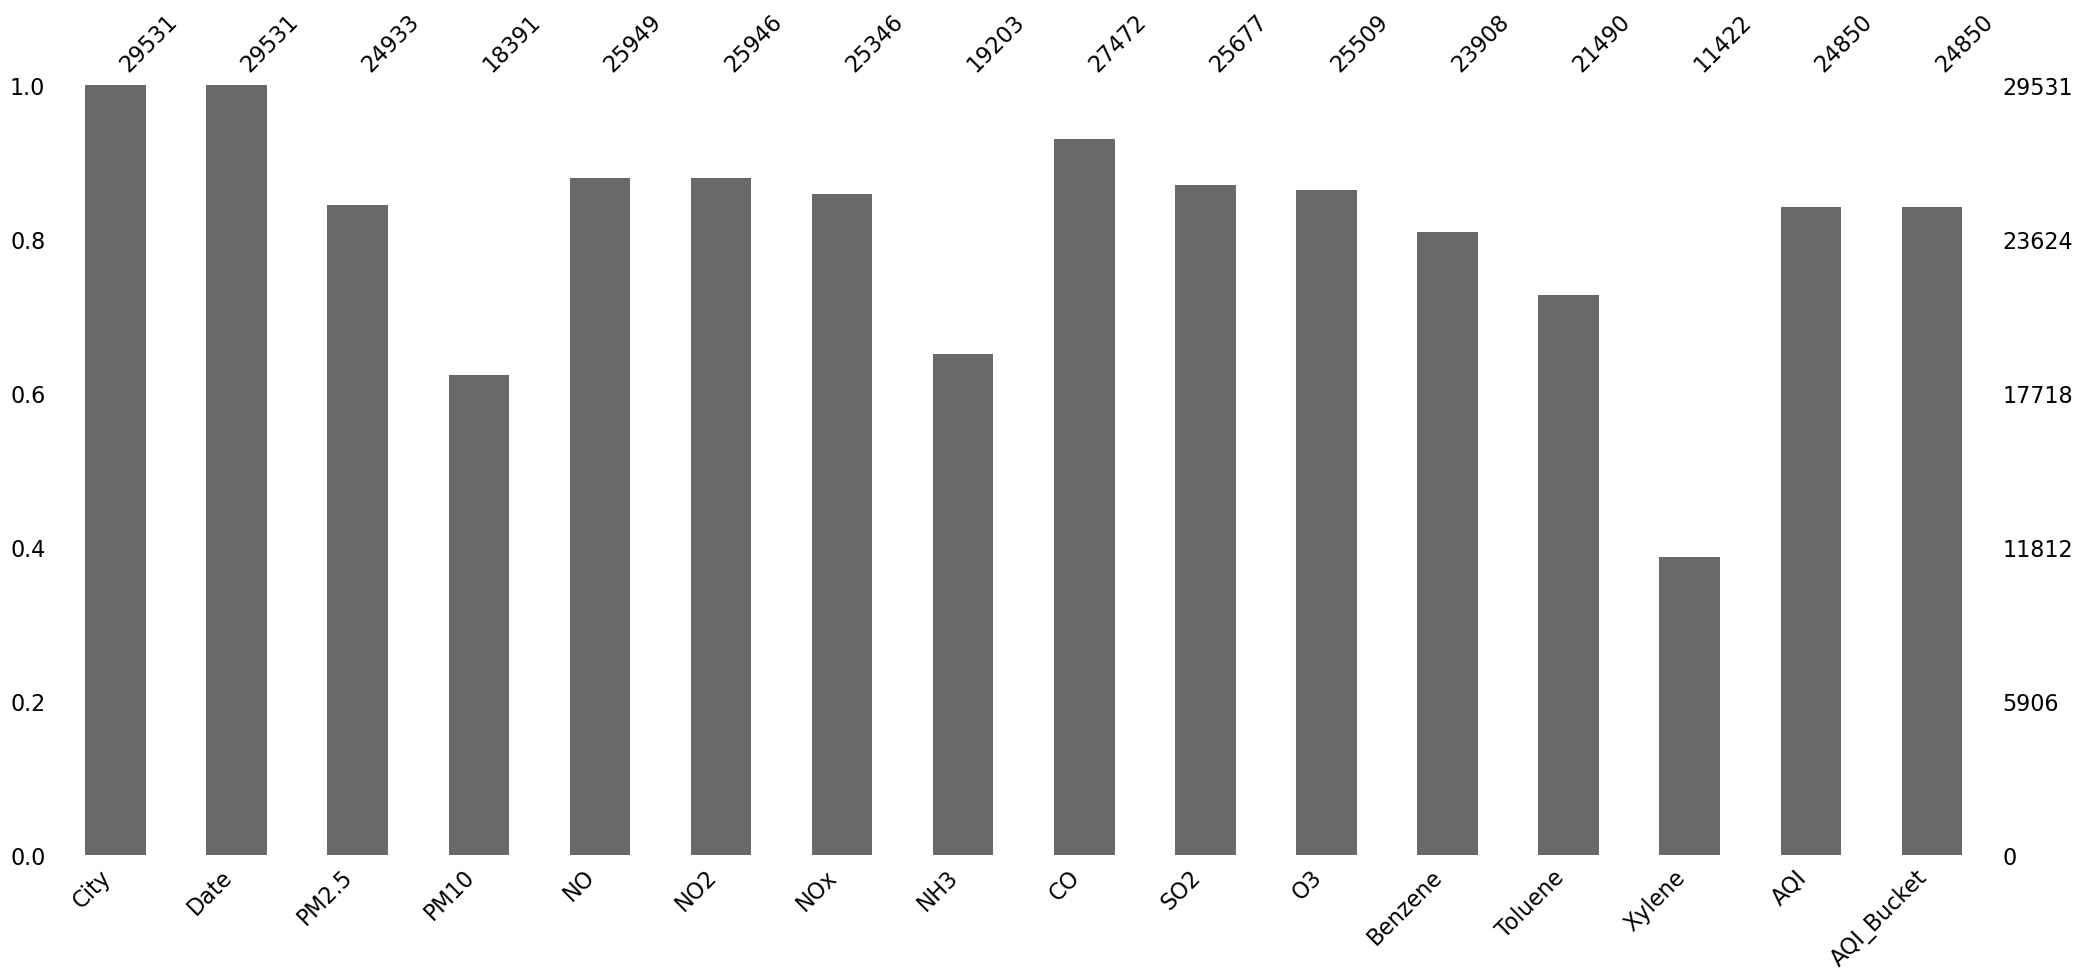

In [6]:
import missingno
missingno.bar(df)

<AxesSubplot:>

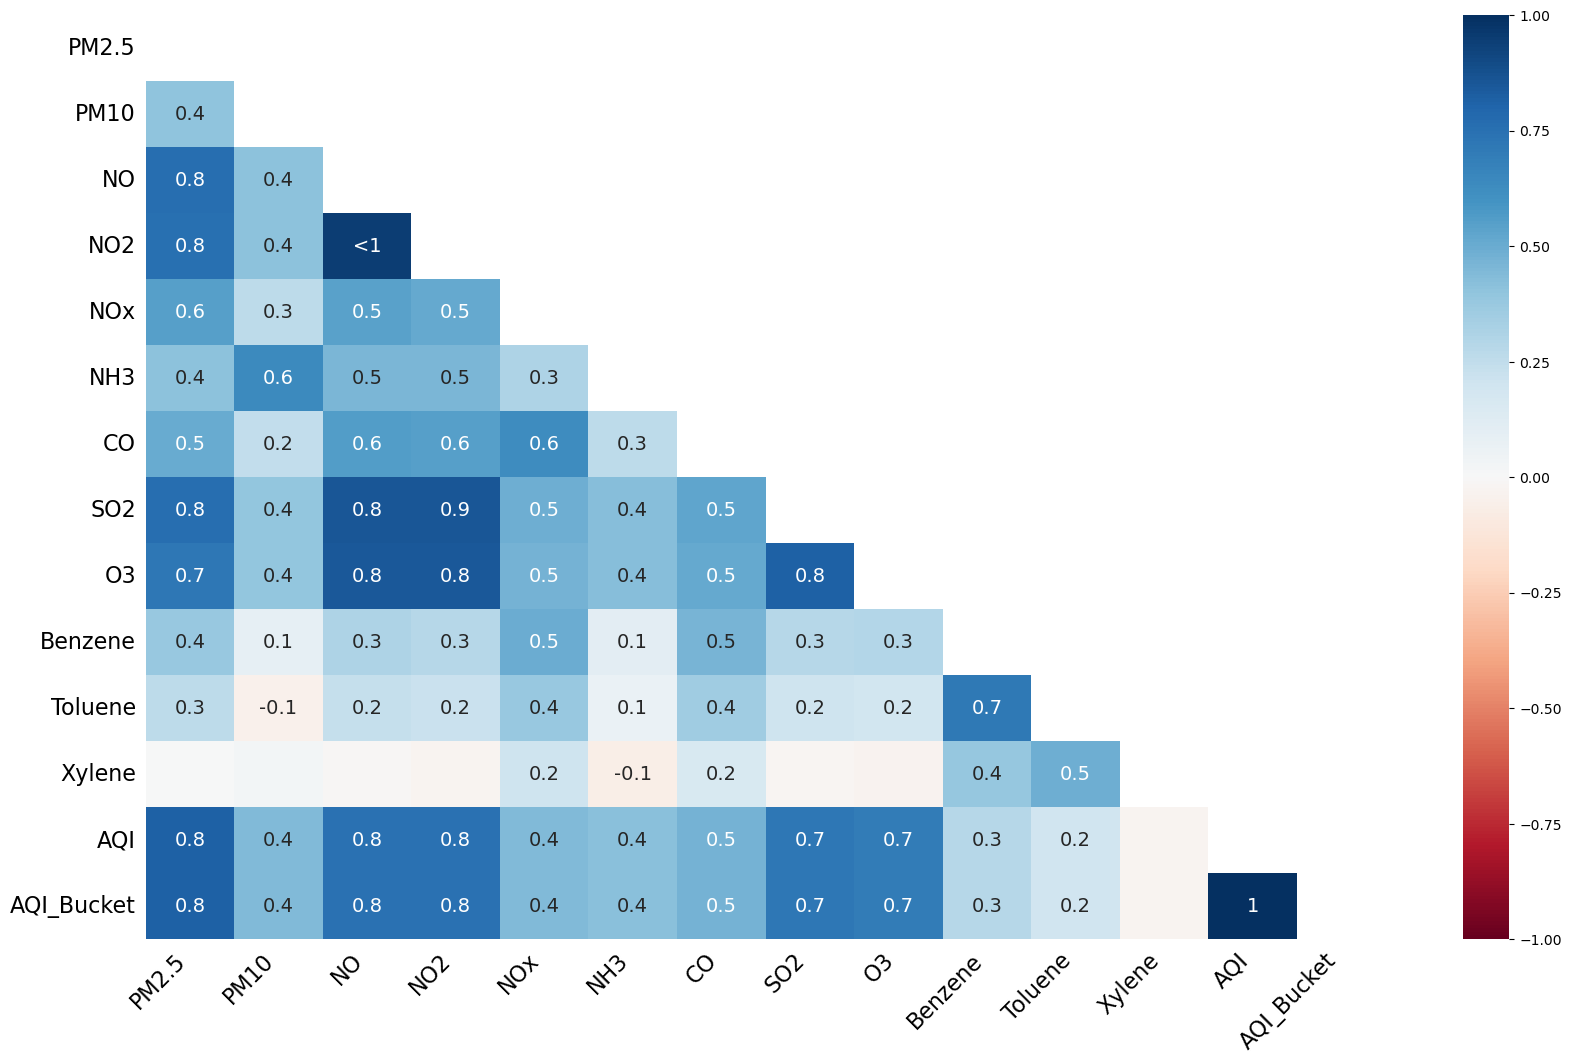

In [7]:
missingno.heatmap(df)

In [8]:
df['PM2.5'] = df['PM2.5'].fillna(df['PM2.5'].median())
df['PM10'] = df['PM10'].fillna(df['PM10'].median())
df['NO'] = df['NO'].fillna(df['NO'].median())
df['NO2'] = df['NO2'].fillna(df['NO2'].median())
df['NOx'] = df['NOx'].fillna(df['NOx'].median())
df['NH3'] = df['NH3'].fillna(df['NH3'].median())
df['CO'] = df['CO'].fillna(df['CO'].median())
df['SO2'] = df['SO2'].fillna(df['SO2'].median())
df['O3'] = df['O3'].fillna(df['O3'].median())
df['Benzene'] = df['Benzene'].fillna(df['Benzene'].median())
df['Toluene'] = df['Toluene'].fillna(df['Toluene'].median())
df['Xylene'] = df['Xylene'].fillna(df['Xylene'].median())
df['AQI'] = df['AQI'].fillna(df['AQI'].median())
df['AQI_Bucket'] = df['AQI_Bucket'].fillna('Moderate')  #because its an object datatype

df.head()
refined_df = df

In [9]:
import matplotlib.pyplot as plt

#press tab for suggestion for variable  names and etc. instead of typing fullname
countAQI = df['AQI_Bucket'].value_counts()
countAQI

Moderate        13510
Satisfactory     8224
Poor             2781
Very Poor        2337
Good             1341
Severe           1338
Name: AQI_Bucket, dtype: int64

In [10]:
# Series to Dataframe
dt_countAQI = pd.DataFrame({'AQI_Bucket': countAQI.index, 'Counts' : countAQI.values})
dt_countAQI

,AQI_Bucket,Counts
0,Moderate,13510
1,Satisfactory,8224
2,Poor,2781
3,Very Poor,2337
4,Good,1341
5,Severe,1338


<AxesSubplot:xlabel='AQI_Bucket'>

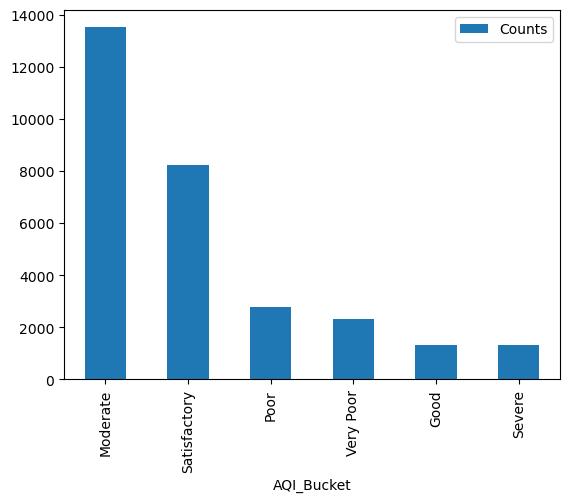

In [11]:
dt_countAQI.plot(x='AQI_Bucket', y ='Counts', kind='bar')

<AxesSubplot:xlabel='AQI_Bucket', ylabel='count'>

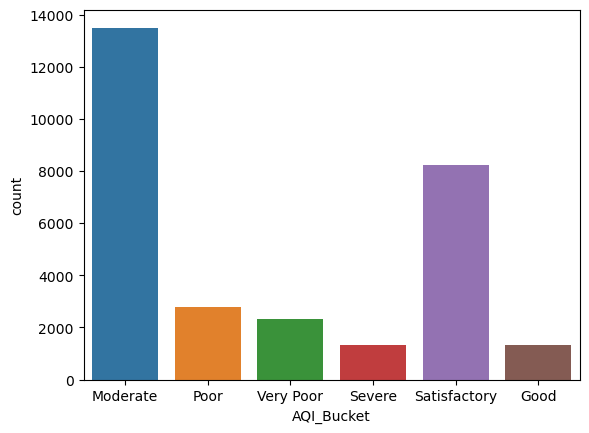

In [12]:
#using Seaborn to plot; no need of converting to series and then to diff.

import seaborn as sns

sns.countplot(x='AQI_Bucket', data=df)

In [13]:
# Divide the dataset into 2 parts. preCOVID and postCOVID

df = df[df['Date'] <= '25-03-2020']

df['Vehicular Pollution Content'] = df['PM2.5'] + df['PM10'] + df['NO'] + df['NO2'] + df['NOx'] + df['NH3'] + df['CO']

df['Industrial Pollution Content'] = df['SO2'] + df['O3'] + df['Benzene'] + df['Toluene'] + df['Xylene']

df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'Benzene', 'Toluene', 'Xylene'], axis=1)

df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,City,Date,O3,AQI,AQI_Bucket,Vehicular Pollution Content,Industrial Pollution Content
0,Ahmedabad,2015-01-01,133.36,118.0,Moderate,197.31,161.02
1,Ahmedabad,2015-01-02,34.06,118.0,Moderate,194.19,71.56
2,Ahmedabad,2015-01-03,30.70,118.0,Moderate,243.90,85.22
3,Ahmedabad,2015-01-04,36.08,118.0,Moderate,199.95,70.24
4,Ahmedabad,2015-01-05,39.31,118.0,Moderate,263.48,107.32


In [14]:
# plotting interactive graphs using plotly

import plotly.express as px

from plotly.offline import iplot

import cufflinks

cufflinks.go_offline()

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.



# PRE COVID

In [15]:
def max_bar_plot(input_df, var, chartTitle):
    
    temp_df = df[['City', var]].groupby(['City']).median().sort_values(by=var, ascending=True).tail(10)
    temp_df.iplot(xTitle='Cities', yTitle=var, kind='bar', title='{} w.r.t {}'.format(chartTitle,var))

def min_bar_plot(input_df, var, chartTitle):
    
    temp_df = df[['City', var]].groupby(['City']).median().sort_values(by=var, ascending=True).head(10)
    temp_df.iplot(xTitle='Cities', yTitle=var, kind='bar', title='{} w.r.t {}'.format(chartTitle,var))
    

max_bar_plot(df, 'Industrial Pollution Content', 'Pre Covid Most Polluted Cities')
max_bar_plot(df, 'Vehicular Pollution Content', 'Pre Covid Most Polluted Cities')

min_bar_plot(df, 'Industrial Pollution Content', 'Pre Covid Least Polluted Cities')
min_bar_plot(df, 'Vehicular Pollution Content', 'Pre Covid Least Polluted Cities')


# POST COVID

In [16]:
df = refined_df

df = df[df['Date'] > '25-03-2020']

df['Vehicular Pollution Content'] = df['PM2.5'] + df['PM10'] + df['NO'] + df['NO2'] + df['NOx'] + df['NH3'] + df['CO']

df['Industrial Pollution Content'] = df['SO2'] + df['O3'] + df['Benzene'] + df['Toluene'] + df['Xylene']

df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'Benzene', 'Toluene', 'Xylene'], axis=1)

df.head()

,City,Date,O3,AQI,AQI_Bucket,Vehicular Pollution Content,Industrial Pollution Content
1911,Ahmedabad,2020-03-26,39.74,216.0,Poor,209.08,101.13
1912,Ahmedabad,2020-03-27,34.41,193.0,Moderate,117.75,60.76
1913,Ahmedabad,2020-03-28,34.72,160.0,Moderate,191.64,86.76
1914,Ahmedabad,2020-03-29,40.17,125.0,Moderate,160.60,84.96
1915,Ahmedabad,2020-03-30,31.50,140.0,Moderate,202.26,101.53


In [17]:
max_bar_plot(df, 'Industrial Pollution Content', 'Post Covid Most Polluted Cities')
max_bar_plot(df, 'Vehicular Pollution Content', 'Post Covid Most Polluted Cities')

min_bar_plot(df, 'Industrial Pollution Content', 'Post Covid Least Polluted Cities')
min_bar_plot(df, 'Vehicular Pollution Content', 'Post Covid Least Polluted Cities')


In [18]:
def satisfactionlevel(input_df, var):
    df_AQI = input_df[input_df.City.isin([var])][['City', 'AQI_Bucket']]
    df_AQI.rename(columns={'AQI_Bucket': var}, inplace=True)
    k = df_AQI[var].value_counts()
    return pd.DataFrame((round( (k/sum(k))*100 )))

In [19]:
df = refined_df
df = df[df['Date'] <= ('25-03-2020')]

city1 = satisfactionlevel(df, 'Ahmedabad')
city2 = satisfactionlevel(df, 'Delhi')
city3 = satisfactionlevel(df, 'Bengaluru')
city4 = satisfactionlevel(df, 'Kolkata')
city5 = satisfactionlevel(df, 'Chennai')
city6 = satisfactionlevel(df, 'Mumbai')

In [20]:
df = pd.concat([city1,city2,city3,city4,city5,city6], axis=1)
df

,Ahmedabad,Delhi,Bengaluru,Kolkata,Chennai,Mumbai
Moderate,42.0,24.0,38.0,29.0,48.0,79.0
Severe,33.0,13.0,NaN,2.0,0.0,NaN
Poor,12.0,28.0,2.0,17.0,6.0,2.0
Very Poor,11.0,27.0,0.0,9.0,1.0,0.0
Satisfactory,1.0,7.0,54.0,33.0,45.0,18.0
Good,0.0,1.0,5.0,10.0,1.0,1.0


In [21]:
city5

,Chennai
Moderate,48.0
Satisfactory,45.0
Poor,6.0
Very Poor,1.0
Good,1.0
Severe,0.0


In [22]:
df.iplot(xTitle='Satisfaction Level', yTitle='Percentage', kind='bar', title='PreCovid Satisfaction of Breathable Air')

In [23]:
df = refined_df
df = df[df['Date'] > ('25-03-2020')]

city1 = satisfactionlevel(df, 'Ahmedabad')
city2 = satisfactionlevel(df, 'Delhi')
city3 = satisfactionlevel(df, 'Bengaluru')
city4 = satisfactionlevel(df, 'Kolkata')
city5 = satisfactionlevel(df, 'Chennai')
city6 = satisfactionlevel(df, 'Mumbai')

df = pd.concat([city1,city2,city3,city4,city5,city6], axis=1)
df.iplot(xTitle='Satisfaction Level', yTitle='Percentage', kind='bar', title='PreCovid Satisfaction of Breathable Air')